In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pytz

In [22]:
# Import Youtube and sleep data
filename = "../youtube_sleep_CB.csv"
df = pd.read_csv(filename)
df = df.drop(columns=["Unnamed: 0"])
df.head()

,date,total_sleep_hours,sleep_start,sleep_end,time_first,url_first,title_first,type_first,time_last,url_last,title_last,type_last,date_time,session_id,session_duration,had_session,total_videos_watched
0,2025-01-07,8.816667,2025-01-07 00:51:00-05:00,2025-01-07 10:00:00-05:00,13:59:03.039000,https://www.youtube.com/watch?v=5hLPYkJ5YOU,Kid-Sized,Watched,20:04:03.239000,https://www.youtube.com/watch?v=eTvs8ldNJ7g,[KR] BROMANCE KOREAN DRAMA TRAILER | Let Me Be...,Watched,2025-01-07 20:04:03.239000-05:00,3,0 days 00:00:36.968000,True,20
1,2025-01-09,6.200000,2025-01-09 00:47:51-05:00,2025-01-09 07:44:51-05:00,22:23:22.028000,https://www.youtube.com/watch?v=yddr6F34UjQ,First Time | Airbnb Setup,Watched,22:23:44.782000,https://www.youtube.com/watch?v=MLWcgJ1wLww,Love Your Skin | Ulta Beauty,Watched,2025-01-09 22:23:44.782000-05:00,4,0 days 00:00:09.109000,True,4
2,2025-01-22,7.025000,2025-01-22 01:54:51-05:00,2025-01-22 08:59:51-05:00,20:55:16.692000,https://www.youtube.com/results?search_query=u...,for us figure skating championships 2025,Searched,21:00:32.489000,https://www.youtube.com/watch?v=kk0C6B_UlA0,Saya Carpenter - Jon Maravilla | Junior Pairs ...,Watched,2025-01-22 21:00:32.489000-05:00,5,0 days 00:00:03.347000,True,6
3,2025-02-06,6.883333,2025-02-06 03:05:30-05:00,2025-02-06 10:00:00-05:00,01:17:28.203000,https://www.youtube.com/watch?v=om_POD45fCs,doing the club penguin dance,Watched,01:48:59.895000,https://www.youtube.com/watch?v=HwStBkyH738,HighlightingMore :13 16:9,Watched,2025-02-06 01:48:59.895000-05:00,6,0 days 00:00:07.418000,True,5
4,2025-02-08,7.216667,2025-02-08 02:51:47-05:00,2025-02-08 12:48:25-05:00,00:10:27.476000,https://www.youtube.com/results?search_query=b...,for boston junior toi,Searched,00:10:47.120000,https://www.youtube.com/watch?v=Ua9ffbSO-20,(2/18) Now Taxes is Free in the App - TurboTa...,Watched,2025-02-08 00:10:47.120000-05:00,7,0 days 00:00:11.137000,True,2


C:\Users\chery\AppData\Local\Temp\ipykernel_27992\4273217170.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time_last"] = pd.to_datetime(df["time_last"])


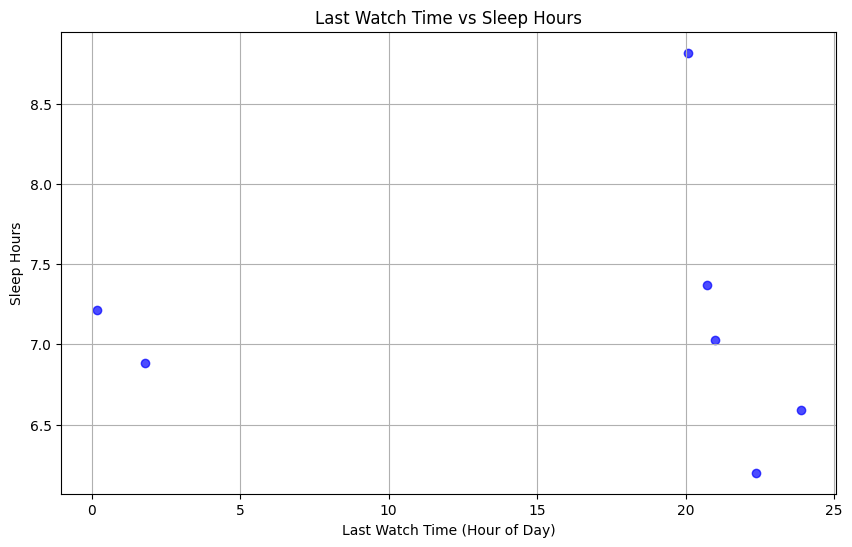

In [23]:
# Convert the last_watch_time into a decimal hour value (e.g., 22:30 -> 22.5)
df["time_last"] = pd.to_datetime(df["time_last"])
df['watch_hour'] = (
    df['time_last'].dt.hour +
    df['time_last'].dt.minute / 60.0
)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['watch_hour'], df['total_sleep_hours'], color='blue', alpha=0.7)

plt.xlabel('Last Watch Time (Hour of Day)')
plt.ylabel('Sleep Hours')
plt.title('Last Watch Time vs Sleep Hours')
plt.grid(True)
plt.show()

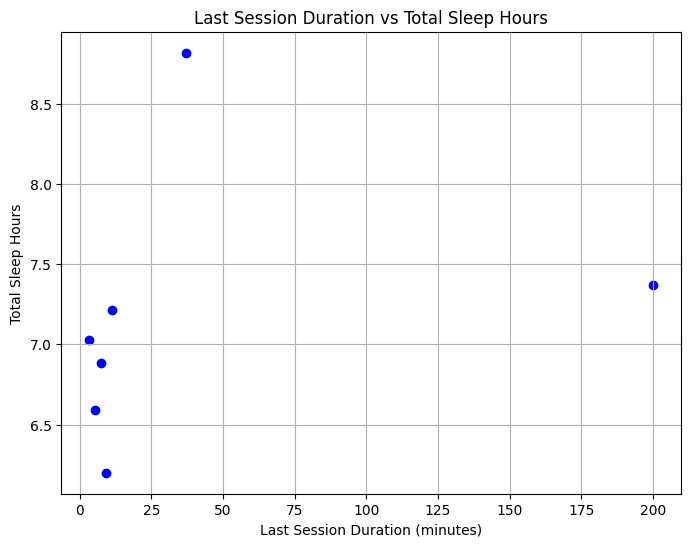

In [24]:
df["session_duration"] = pd.to_timedelta(df["session_duration"])
df['duration_seconds'] = df['session_duration'].dt.total_seconds()

# Plotting: Scatter plot of last session duration vs. total sleep hours
plt.figure(figsize=(8, 6))
plt.scatter(df['duration_seconds'], df['total_sleep_hours'], color='blue', marker='o')

# Adding titles and labels
plt.title('Last Session Duration vs Total Sleep Hours')
plt.xlabel('Last Session Duration (minutes)')
plt.ylabel('Total Sleep Hours')
plt.grid(True)

# Display the plot
plt.show()

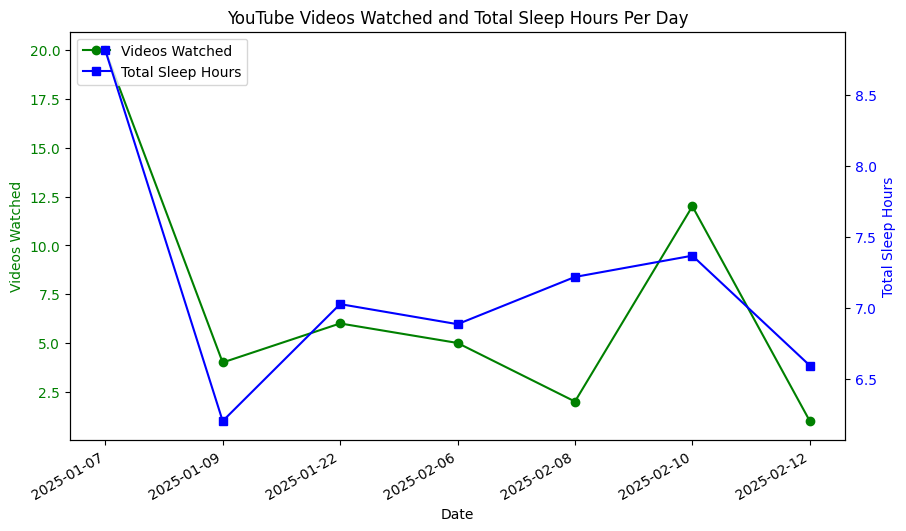

In [25]:
# Plot using dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot videos watched per day on the left y-axis
ax1.plot(df['date'], df['total_videos_watched'], 'g-o', label='Videos Watched')
ax1.set_xlabel('Date')
ax1.set_ylabel('Videos Watched', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis to plot sleep hours
ax2 = ax1.twinx()
ax2.plot(df['date'], df['total_sleep_hours'], 'b-s', label='Total Sleep Hours')
ax2.set_ylabel('Total Sleep Hours', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('YouTube Videos Watched and Total Sleep Hours Per Day')
fig.autofmt_xdate()  # Rotate date labels for better readability

# Optionally, add legends (combining both lines)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

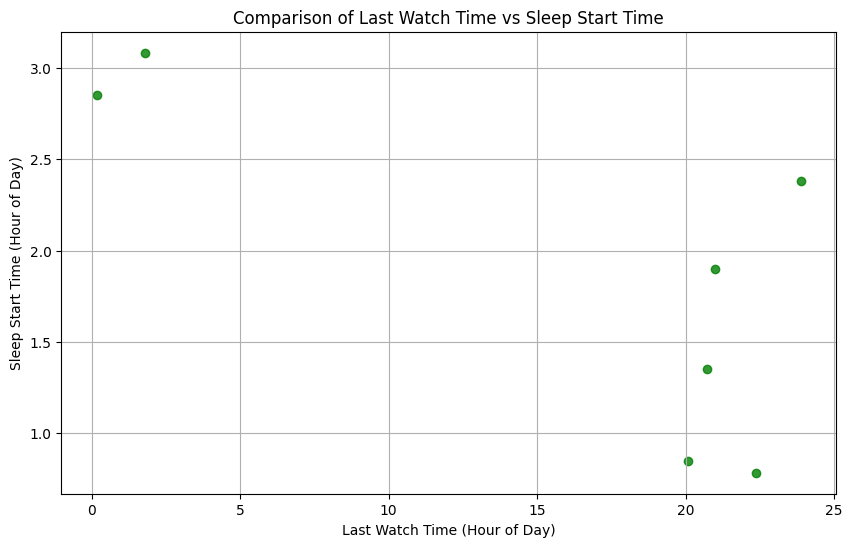

In [26]:
# Convert datetime columns to decimal hours
df["sleep_start"] = pd.to_datetime(df["sleep_start"])
df['sleep_start_hour'] = (
    df['sleep_start'].dt.hour +
    df['sleep_start'].dt.minute / 60.0
)

# Create a scatter plot comparing last watch time with sleep start time
plt.figure(figsize=(10, 6))
plt.scatter(
    df['watch_hour'], 
    df['sleep_start_hour'],
    color='green', alpha=0.8
)

plt.xlabel('Last Watch Time (Hour of Day)')
plt.ylabel('Sleep Start Time (Hour of Day)')
plt.title('Comparison of Last Watch Time vs Sleep Start Time')
plt.grid(True)

# # Optional: Add a reference line (x = y) to visualize differences
# plt.plot([0, 24], [0, 24], 'r--', alpha=0.5)
# plt.xlim(0, 24)
# plt.ylim(0, 24)

plt.show()